### Introduction to Tensors and comparison with Numpy arrays

In [2]:
import torch
from torch.autograd import Variable

In [3]:
import numpy as np

In [4]:
a = torch.Tensor((2,2))

### Seeds and Reproducibility

In [5]:
np.random.seed(2)
b = np.random.rand(3,3)
b

array([[ 0.4359949 ,  0.02592623,  0.54966248],
       [ 0.43532239,  0.4203678 ,  0.33033482],
       [ 0.20464863,  0.61927097,  0.29965467]])

In [6]:
torch.random.manual_seed(5)
c = torch.rand(3,3)
c

tensor([[0.8303, 0.1261, 0.9075],
        [0.8199, 0.9201, 0.1166],
        [0.1644, 0.7379, 0.0333]])

For GPU : Seed configuration is different as shown

In [7]:
torch.cuda.manual_seed_all(2)

### Numpy to Torch Bridge

In [8]:
a = np.array([[1,2],[4,5]],dtype=np.float64)
a

array([[ 1.,  2.],
       [ 4.,  5.]])

In [9]:
b = torch.from_numpy(a)
b

tensor([[1., 2.],
        [4., 5.]], dtype=torch.float64)

Conversion is only supported for : double , float , int64 , int32 , uint8

### Torch to Numpy Bridge

In [10]:
torch.random.manual_seed(2)
torch_tensor = torch.rand(3,3)
torch_tensor

tensor([[0.6147, 0.3810, 0.6371],
        [0.4745, 0.7136, 0.6190],
        [0.4425, 0.0958, 0.6142]])

In [11]:
numpy_array = torch_tensor.numpy()
numpy_array

array([[ 0.61469507,  0.38101286,  0.63711435],
       [ 0.47446108,  0.71359384,  0.61903638],
       [ 0.44253266,  0.09576863,  0.6141572 ]], dtype=float32)

### Torch tensors CPU to GPU

In [12]:
tensor_cpu = torch.ones(2,2)
tensor_cpu

tensor([[1., 1.],
        [1., 1.]])

In [13]:
tensor_cpu.cuda()

tensor([[1., 1.],
        [1., 1.]], device='cuda:0')

In [14]:
tensor_cpu.cpu()

tensor([[1., 1.],
        [1., 1.]])

### Tensor Operations

In [15]:
a = torch.ones(2,2)
b = torch.ones(2,2)
c = a + b
print(c)
d = torch.add(a,b)
print(d)
d.add_(c)
print(d)


tensor([[2., 2.],
        [2., 2.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[4., 4.],
        [4., 4.]])


 Element-wise Subtraction

In [16]:
a = torch.ones(2,2)
b = torch.ones(2,2)
c = torch.sub(a,b)
print(c)
b.sub(a)
print(b)

tensor([[0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.]])


Element-wise Multiplication and Element-wise Division is same as Addition and Subtraction

Torch Mean

In [17]:
tensor = torch.Tensor([1,2,3,4,5,6,7,8,9,10])
tensor.size()

torch.Size([10])

In [18]:
tensor.mean(dim=0)

tensor(5.5000)

In [39]:
new_tensor = torch.Tensor([[5,5,5,5,5],[2,2,2,2,2]])
print(new_tensor.mean(dim=1))
print(new_tensor.mean(dim=0))

tensor([5., 2.])
tensor([3.5000, 3.5000, 3.5000, 3.5000, 3.5000])


Torch Standard Deviation

In [20]:
tensor.std(dim=0)

tensor(3.0277)

### Variables

1) Variable is wrapper around a tensor
2) Allows for accumulation of gradients

In [21]:
a = Variable(torch.ones(2,2),requires_grad = True)
b = Variable(torch.ones(2,2),requires_grad = True)
torch.add(a,b)

tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)

Variable is same as creating a torch tensor and all the operations are same

### Gradients

In [22]:
x = Variable(torch.Tensor([1,2]),requires_grad=True)
x.size()

torch.Size([2])

In [23]:
y = 5 * (x+1)**2
y

tensor([20., 45.], grad_fn=<MulBackward0>)

Backward should only be called on a scalar (1 element tensor) or with gradient w.r.t the variable

Reduce y to scalar

In [24]:
o = (1/2)*torch.sum(y)
o

tensor(32.5000, grad_fn=<MulBackward0>)

In [25]:
o.backward()

In [26]:
x.grad

tensor([10., 15.])

When you use backward it calculates the gradients and you use x.grad to access the gradients

Gradients:
    1)Define original equation
    2)Substitute equation with x values
    3)Reduce to scalar input o,though mean
    4)Calculate gradients through o.backward()
    5)Access gradients through x.grad

### Linear Regression

Building a toy dataset

In [27]:
x = [i for i in range(11)]
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [28]:
x_train = np.array(x,dtype=np.float32)
x_train.shape

(11,)

A 2D array is required

In [29]:
x_train=x_train.reshape(-1,1)
x_train.shape

(11, 1)

In [30]:
y = [2*i+1 for i in range(11)]
y

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [31]:
y_train = np.array(y,dtype=np.float32)
y_train.shape

(11,)

In [32]:
y_train=y_train.reshape(-1,1)
y_train.shape

(11, 1)

Important imports

In [33]:
import torch.nn as nn
from torch.autograd import Variable

All problems using Pytorch are all about creating a particular model class

#### How to create a class

In [34]:
class LinearRegressionmodel(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegressionmodel,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out = self.linear(x)
        return out 

super lets you inherit all the content __init__ method from LinearRegressionModel

nn.Module is the parent class and lets you inherit its various functions and attributes

#### Instantiate Model class

In [50]:
input_dim = 1
output_dim = 1
model = LinearRegressionmodel(input_dim,output_dim)

In [128]:
##For gpu use##
gpu_use = False
if gpu_use == True:
    model.cuda()

#### Instantiate Loss class

Mean squared error

In [129]:
criterion = nn.MSELoss()

#### Instantiate Optimizer class

In [130]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

1 epoch is equal to going through all the instances once

In [131]:
epochs = 100

for epoch in range(epochs):
    
    #Convert numpy arrays to Variables
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    if gpu_use == True:
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    
    #Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    #Forward to get output
    outputs=model(inputs)
    
    #Calculate loss
    loss = criterion(outputs,labels)
    
    #Getting gradients w.r.t. parameters
    loss.backward()
    
    #Updating parameters
    optimizer.step()
    
    print('epoch {},loss {}'.format(epoch,loss.data))

epoch 0,loss 0.07908068597316742
epoch 1,loss 0.0781976729631424
epoch 2,loss 0.07732445746660233
epoch 3,loss 0.07646098732948303
epoch 4,loss 0.07560715079307556
epoch 5,loss 0.07476282119750977
epoch 6,loss 0.07392793148756027
epoch 7,loss 0.0731024295091629
epoch 8,loss 0.0722861960530281
epoch 9,loss 0.07147891074419022
epoch 10,loss 0.07068070769309998
epoch 11,loss 0.06989142298698425
epoch 12,loss 0.0691109374165535
epoch 13,loss 0.06833919882774353
epoch 14,loss 0.067576102912426
epoch 15,loss 0.06682145595550537
epoch 16,loss 0.06607530266046524
epoch 17,loss 0.06533738970756531
epoch 18,loss 0.06460785120725632
epoch 19,loss 0.06388634443283081
epoch 20,loss 0.06317292898893356
epoch 21,loss 0.06246745586395264
epoch 22,loss 0.06176987662911415
epoch 23,loss 0.06108011305332184
epoch 24,loss 0.06039804592728615
epoch 25,loss 0.05972360447049141
epoch 26,loss 0.05905674397945404
epoch 27,loss 0.05839725583791733
epoch 28,loss 0.057745132595300674
epoch 29,loss 0.0571003220975

#### Comparison of Predicted values

In [141]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[  0.69995564],
       [  2.74316478],
       [  4.78637362],
       [  6.82958269],
       [  8.87279224],
       [ 10.91600132],
       [ 12.9592104 ],
       [ 15.00241947],
       [ 17.04562759],
       [ 19.08883667],
       [ 21.13204575]], dtype=float32)

#### Plotting the Graph

In [142]:
import matplotlib.pyplot as plt

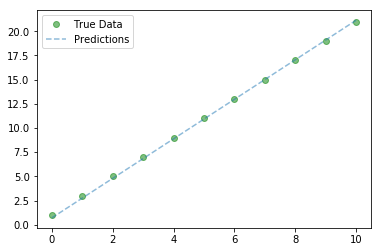

In [143]:
plt.clf()

plt.plot(x_train,y_train,'go',label='True Data',alpha=0.5)

plt.plot(x_train,predicted,'--',label='Predictions',alpha=0.5)

plt.legend(loc='best')
plt.show()

#### Save the model

In [144]:
save_model = False
if save_model == True:
    torch.save(model.state_dict(),'awesome.pkl')

In [145]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[2.0432]])),
             ('linear.bias', tensor([0.7000]))])